In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Project/Data/Tb disease symptoms without id and datetime.csv"
df = pd.read_csv(file_path)

display(df.head())
display(df.info())

,no,name,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
0,1,Carolyn,Female,0,0,0,1,0,0,0,1,1,1,1,1,0
1,2,Bari,Female,1,0,1,1,1,0,1,0,1,0,0,1,1
2,3,Edita,Male,0,0,0,1,1,1,1,0,0,0,1,0,1
3,4,Emmery,Female,0,0,1,0,1,0,0,0,0,1,0,0,0
4,5,Hilly,Female,0,0,0,1,0,0,1,0,1,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   name                                                       1000 non-null   object
 2   gender                                                     1000 non-null   object
 3   fever for two weeks                                        1000 non-null   int64 
 4   coughing blood                                             1000 non-null   int64 
 5   sputum mixed with blood                                    1000 non-null   int64 
 6   night sweats                                               1000 non-null   int64 
 7   chest pain                                                 1000 non-null   int64 
 8   back pain in certai

None

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Project/Data/Tb disease symptoms.csv"
df = pd.read_csv(file_path)

display(df.head())
display(df.info())

,no,id,name,gender,date,time,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
0,1,8048761033,Noe,Male,12/10/2020,4:51 PM,0,1,1,1,1,1,1,1,0,0,1,0,1
1,2,793846900,Genna,Male,11/16/2020,9:35 AM,1,1,1,0,0,1,1,0,0,0,1,1,1
2,3,5619727459,Leesa,Male,1/18/2020,8:38 PM,0,0,1,1,0,1,0,0,0,1,1,1,1
3,4,4337104062,Case,Female,2/4/2020,3:09 PM,0,1,0,1,1,0,0,1,1,0,1,0,1
4,5,9507094539,Leola,Female,7/9/2020,5:51 PM,0,1,0,1,1,1,0,1,1,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   id                                                         1000 non-null   int64 
 2   name                                                       1000 non-null   object
 3   gender                                                     1000 non-null   object
 4   date                                                       1000 non-null   object
 5   time                                                       1000 non-null   object
 6   fever for two weeks                                        1000 non-null   int64 
 7   coughing blood                                             1000 non-null   int64 
 8   sputum mixed with b

None

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Aggregate data by date to count entries per day
daily_counts = df['date'].value_counts().sort_index()

display(daily_counts.head())

,count
date,
2020-01-01,4
2020-01-02,2
2020-01-03,6
2020-01-04,5
2020-01-06,5


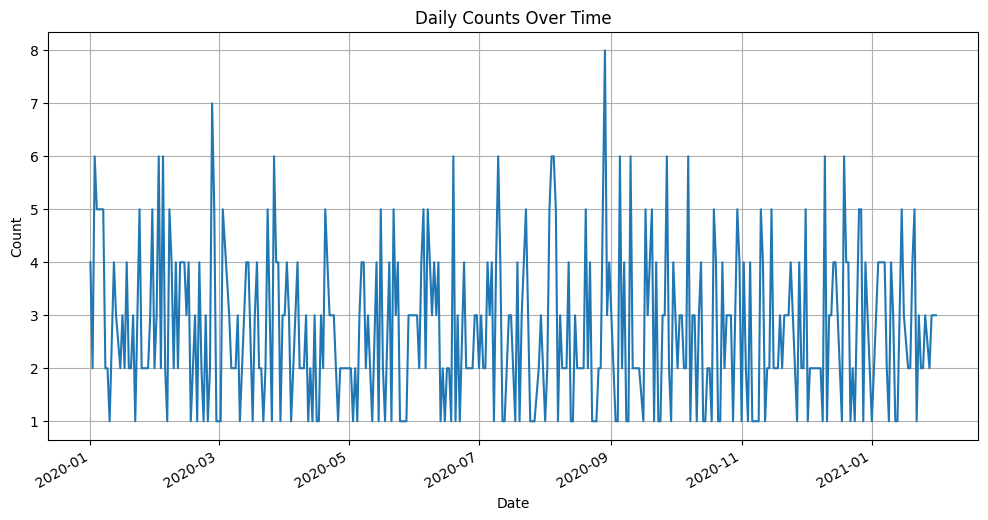

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
# Resample to weekly frequency and sum the counts
weekly_counts = daily_counts.resample('W').sum()

display(weekly_counts.head())

,count
date,
2020-01-05,17
2020-01-12,19
2020-01-19,16
2020-01-26,15
2020-02-02,23


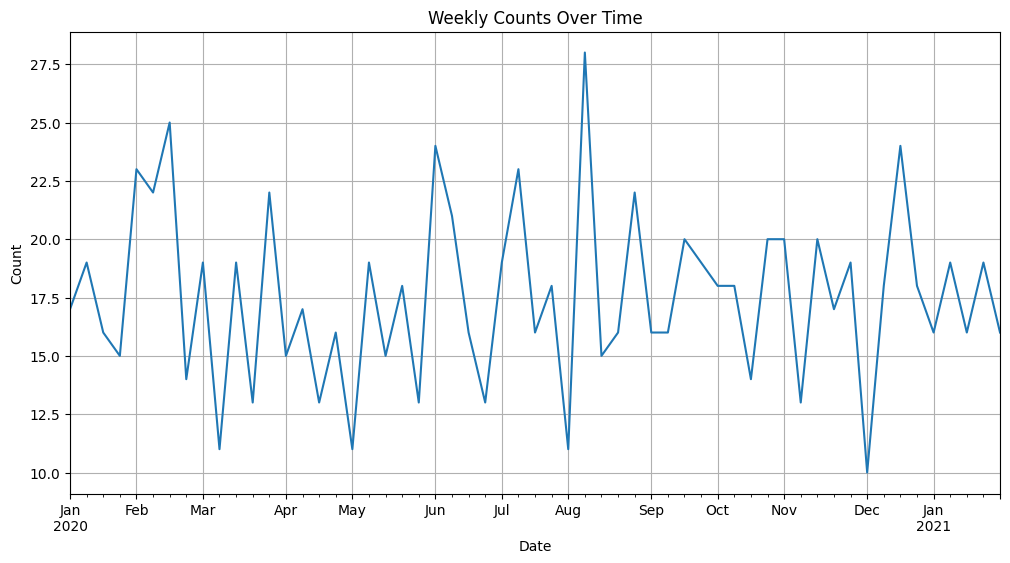

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
weekly_counts.plot()
plt.title('Weekly Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(weekly_counts, model='additive')

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Weekly Counts Time Series Decomposition (Additive Model)', y=1.02)
plt.show()

ValueError: x must have 2 complete cycles requires 104 observations. x only has 57 observation(s)

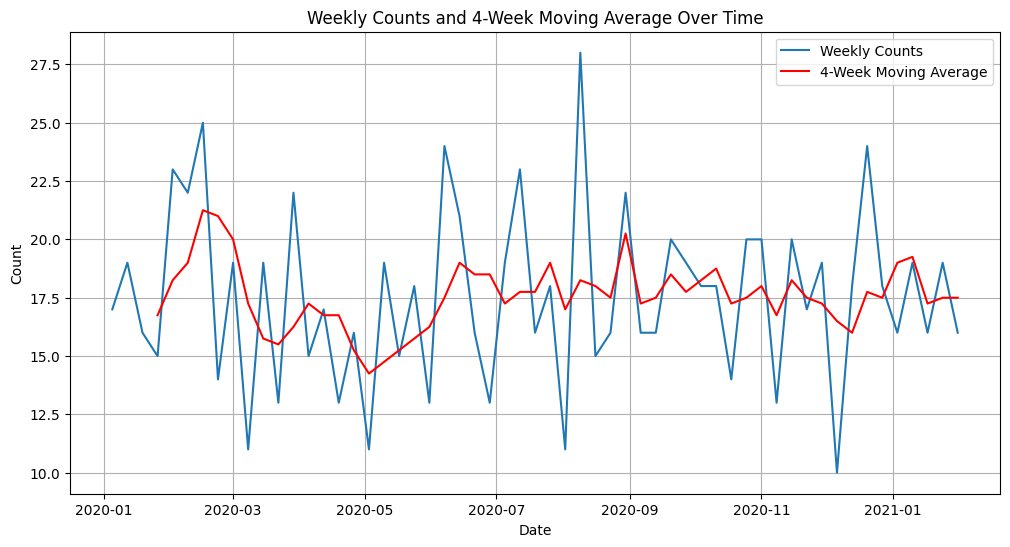

In [ ]:
# Calculate a 4-week moving average
moving_average = weekly_counts.rolling(window=4).mean()

# Plot the original weekly counts and the moving average
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts, label='Weekly Counts')
plt.plot(moving_average, label='4-Week Moving Average', color='red')
plt.title('Weekly Counts and 4-Week Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

I will now examine the contents of each data file to determine its suitability for disease forecasting.

In [ ]:
import pandas as pd

file_list = [
    "/content/drive/MyDrive/Project/Data/Tb disease symptoms without id and datetime.csv",
    "/content/drive/MyDrive/Project/Data/Tb disease symptoms.csv",
    "/content/drive/MyDrive/Project/Data/dataset.csv",
    "/content/drive/MyDrive/Project/Data/data.csv",
    "/content/drive/MyDrive/Project/Data/extracted/cholera_demographic_2024.csv",
    "/content/drive/MyDrive/Project/Data/extracted/cholera_weekly_2024.csv"
]

for file_path in file_list:
    try:
        if file_path.endswith('.csv'):
            print(f"Examining CSV file: {file_path}")
            df = pd.read_csv(file_path)
            display(df.head())
            display(df.info())
            print("-" * 30)
        elif file_path.endswith('.xlsx'):
            # We will handle Excel files separately if needed
            pass # Skipping for now to focus on CSVs
    except Exception as e:
        print(f"Could not read {file_path}: {e}")
        print("-" * 30)

Examining CSV file: /content/drive/MyDrive/Project/Data/Tb disease symptoms without id and datetime.csv


,no,name,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
0,1,Carolyn,Female,0,0,0,1,0,0,0,1,1,1,1,1,0
1,2,Bari,Female,1,0,1,1,1,0,1,0,1,0,0,1,1
2,3,Edita,Male,0,0,0,1,1,1,1,0,0,0,1,0,1
3,4,Emmery,Female,0,0,1,0,1,0,0,0,0,1,0,0,0
4,5,Hilly,Female,0,0,0,1,0,0,1,0,1,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   name                                                       1000 non-null   object
 2   gender                                                     1000 non-null   object
 3   fever for two weeks                                        1000 non-null   int64 
 4   coughing blood                                             1000 non-null   int64 
 5   sputum mixed with blood                                    1000 non-null   int64 
 6   night sweats                                               1000 non-null   int64 
 7   chest pain                                                 1000 non-null   int64 
 8   back pain in certai

None

------------------------------
Examining CSV file: /content/drive/MyDrive/Project/Data/Tb disease symptoms.csv


,no,id,name,gender,date,time,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
0,1,8048761033,Noe,Male,12/10/2020,4:51 PM,0,1,1,1,1,1,1,1,0,0,1,0,1
1,2,793846900,Genna,Male,11/16/2020,9:35 AM,1,1,1,0,0,1,1,0,0,0,1,1,1
2,3,5619727459,Leesa,Male,1/18/2020,8:38 PM,0,0,1,1,0,1,0,0,0,1,1,1,1
3,4,4337104062,Case,Female,2/4/2020,3:09 PM,0,1,0,1,1,0,0,1,1,0,1,0,1
4,5,9507094539,Leola,Female,7/9/2020,5:51 PM,0,1,0,1,1,1,0,1,1,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   id                                                         1000 non-null   int64 
 2   name                                                       1000 non-null   object
 3   gender                                                     1000 non-null   object
 4   date                                                       1000 non-null   object
 5   time                                                       1000 non-null   object
 6   fever for two weeks                                        1000 non-null   int64 
 7   coughing blood                                             1000 non-null   int64 
 8   sputum mixed with b

None

------------------------------
Examining CSV file: /content/drive/MyDrive/Project/Data/dataset.csv


,id,disease_name,type,symptoms,causes,transmission_mode,treatment,prevention,heart_rate,blood_pressure_systolic,blood_pressure_diastolic,fever,body_temperature,duration_of_infection,infection_status
0,1,Tuberculosis,Communicable,"Cough, chest pain, weight loss, fever",Mycobacterium tuberculosis bacteria,Airborne,Antibiotics,"Vaccination, good hygiene",98,128,80,False,37.7,17,Infected
1,2,Lung Cancer,Non-communicable,"Persistent cough, chest pain, weight loss","Smoking, genetic factors",NaN,"Surgery, chemotherapy, radiation","Avoid smoking, regular screenings",80,123,82,False,36.8,22,Infected
2,3,Cholera,Water-borne,"Severe diarrhea, dehydration",Vibrio cholerae bacteria,Contaminated water,"Rehydration, antibiotics","Safe drinking water, sanitation",60,132,64,False,36.7,4,Infected
3,4,Tuberculosis,Communicable,"Cough, chest pain, weight loss, fever",Mycobacterium tuberculosis bacteria,Airborne,Antibiotics,"Vaccination, good hygiene",77,107,82,False,39.0,1,Infected
4,5,Lung Cancer,Non-communicable,"Persistent cough, chest pain, weight loss","Smoking, genetic factors",NaN,"Surgery, chemotherapy, radiation","Avoid smoking, regular screenings",68,116,66,True,38.8,0,Infected


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20000 non-null  int64  
 1   disease_name              17982 non-null  object 
 2   type                      20000 non-null  object 
 3   symptoms                  17982 non-null  object 
 4   causes                    17982 non-null  object 
 5   transmission_mode         11985 non-null  object 
 6   treatment                 17982 non-null  object 
 7   prevention                17982 non-null  object 
 8   heart_rate                20000 non-null  int64  
 9   blood_pressure_systolic   20000 non-null  int64  
 10  blood_pressure_diastolic  20000 non-null  int64  
 11  fever                     20000 non-null  bool   
 12  body_temperature          20000 non-null  float64
 13  duration_of_infection     20000 non-null  int64  
 14  infect

None

------------------------------
Examining CSV file: /content/drive/MyDrive/Project/Data/data.csv


,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 2492 non-null   object
 1   Year                                    2492 non-null   int64 
 2   Number of reported cases of cholera     2470 non-null   object
 3   Number of reported deaths from cholera  2375 non-null   object
 4   Cholera case fatality rate              2365 non-null   object
 5   WHO Region                              2492 non-null   object
dtypes: int64(1), object(5)
memory usage: 116.9+ KB


None

------------------------------
Examining CSV file: /content/drive/MyDrive/Project/Data/extracted/cholera_demographic_2024.csv


,Year,AgeGroup,Gender,ProportionCases
0,2024,<5 years,Male,0.208
1,2024,<5 years,Female,0.192
2,2024,25-34 years,Male,0.156
3,2024,25-34 years,Female,0.144
4,2024,Other,Male,0.156


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             6 non-null      int64  
 1   AgeGroup         6 non-null      object 
 2   Gender           6 non-null      object 
 3   ProportionCases  6 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes


None

------------------------------
Examining CSV file: /content/drive/MyDrive/Project/Data/extracted/cholera_weekly_2024.csv


,State,Week,Year,Cases,Deaths,CFR
0,Katsina,36,2024,66,0,0.0
1,Lagos,36,2024,55,1,0.7
2,Kano,36,2024,10,0,0.0
3,Jigawa,36,2024,7,0,0.0
4,Adamawa,36,2024,2,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   6 non-null      object 
 1   Week    6 non-null      int64  
 2   Year    6 non-null      int64  
 3   Cases   6 non-null      int64  
 4   Deaths  6 non-null      int64  
 5   CFR     6 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 420.0+ bytes


None

------------------------------


In [ ]:
import pandas as pd

excel_files = [
    "/content/drive/MyDrive/Project/Data/Book1(AutoRecovered).xlsx",
    "/content/drive/MyDrive/Project/Data/Data TB.xlsx"
]

for file_path in excel_files:
    try:
        if file_path.endswith('.xlsx'):
            print(f"Examining Excel file: {file_path}")
            # Attempt to read the first sheet by default
            df_excel = pd.read_excel(file_path)
            display(df_excel.head())
            display(df_excel.info())
            print("-" * 30)
    except Exception as e:
        print(f"Could not read {file_path}: {e}")
        print("-" * 30)

Examining Excel file: /content/drive/MyDrive/Project/Data/Book1(AutoRecovered).xlsx


,date,Number of cholera cases,Number of cholera deaths,Location (state or region,Date (daily or monthly,"Rainfall (mm, daily/monthly)","Temperature (mean/max/min, °C)",Relative humidity (%),Access to clean water (%),Sanitation coverage (%),Population density (per km²),Poverty rate (%),Flood events (frequency/severity),Drought events (frequency),Healthcare access (facilities per population),Vaccination coverage (%),"Conflict/displacement (e.g., IDP numbers)","Water source contamination (e.g., fecal coliform levels)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   date                                                      0 non-null      object
 1   Number of cholera cases                                   0 non-null      object
 2   Number of cholera deaths                                  0 non-null      object
 3   Location (state or region                                 0 non-null      object
 4   Date (daily or monthly                                    0 non-null      object
 5   Rainfall (mm, daily/monthly)                              0 non-null      object
 6   Temperature (mean/max/min, °C)                            0 non-null      object
 7   Relative humidity (%)                                     0 non-null      object
 8   Access to clean water (%)                 

None

------------------------------
Examining Excel file: /content/drive/MyDrive/Project/Data/Data TB.xlsx


,Local Government Area,Month,Gender,Affected People,Year
0,Alegongo Primary Health Care,January,M,16,2024
1,Alegongo Primary Health Care,February,M,14,2024
2,Alegongo Primary Health Care,March,M,17,2024
3,Alegongo Primary Health Care,April,M,15,2024
4,Alegongo Primary Health Care,May,M,23,2024


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Local Government Area  360 non-null    object
 1   Month                  360 non-null    object
 2   Gender                 360 non-null    object
 3   Affected People        360 non-null    int64 
 4   Year                   360 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 14.2+ KB


None

------------------------------


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Project/Data/extracted/cholera_weekly_2024.csv"
df_weekly_cholera = pd.read_csv(file_path)

# Create a weekly time index. Assuming week 1 starts at the beginning of the year.
# We need to be careful with week 53 in some years, but for 2024, ISO 8601 has 52 weeks.
# We can create a date representing the start of each week.
df_weekly_cholera['week_start_date'] = pd.to_datetime(df_weekly_cholera['Year'].astype(str) + '-W' + df_weekly_cholera['Week'].astype(str) + '-1', format='%Y-W%W-%w')

# Set the week_start_date as the index
df_weekly_cholera = df_weekly_cholera.set_index('week_start_date')

display(df_weekly_cholera.head())
display(df_weekly_cholera.info())

,State,Week,Year,Cases,Deaths,CFR
week_start_date,,,,,,
2024-09-02,Katsina,36,2024,66,0,0.0
2024-09-02,Lagos,36,2024,55,1,0.7
2024-09-02,Kano,36,2024,10,0,0.0
2024-09-02,Jigawa,36,2024,7,0,0.0
2024-09-02,Adamawa,36,2024,2,0,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2024-09-02 to 2024-09-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   6 non-null      object 
 1   Week    6 non-null      int64  
 2   Year    6 non-null      int64  
 3   Cases   6 non-null      int64  
 4   Deaths  6 non-null      int64  
 5   CFR     6 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 336.0+ bytes


None

In [ ]:
# Find the most recurring state
most_frequent_state = df_weekly_cholera['State'].value_counts().index[0]
print(f"The most recurring state in the dataset is: {most_frequent_state}")

# Filter the DataFrame for the most frequent state
df_state = df_weekly_cholera[df_weekly_cholera['State'] == most_frequent_state]

# Select the 'Cases' column for time series analysis
state_weekly_cases = df_state['Cases']

display(state_weekly_cases.head())
display(state_weekly_cases.info())

The most recurring state in the dataset is: Katsina


,Cases
week_start_date,
2024-09-02,66


<class 'pandas.core.series.Series'>
DatetimeIndex: 1 entries, 2024-09-02 to 2024-09-02
Series name: Cases
Non-Null Count  Dtype
--------------  -----
1 non-null      int64
dtypes: int64(1)
memory usage: 16.0 bytes


None

In [ ]:
# Aggregate the data by week to get total cases across all states
total_weekly_cases = df_weekly_cholera.groupby('week_start_date')['Cases'].sum()

display(total_weekly_cases.head())
display(total_weekly_cases.info())

,Cases
week_start_date,
2024-09-02,140


<class 'pandas.core.series.Series'>
DatetimeIndex: 1 entries, 2024-09-02 to 2024-09-02
Series name: Cases
Non-Null Count  Dtype
--------------  -----
1 non-null      int64
dtypes: int64(1)
memory usage: 16.0 bytes


None